In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# WHAT ARE THE DIFFERENCES BETWEEN PCA and Autoencoders

if the cost function is MSE and the autoencoder uses only linear activations it will perform a PCA.

In [12]:
nsample = 5000
n_components = 3

x1 = np.sin(np.linspace(0,6.28, nsample))
x2 = np.linspace(-5,5, nsample)
x3 = np.linspace(0,100,nsample)
x4 = np.random.choice([-1,0,1],nsample)
x5 = x2*x4/(x3+1)
x6 = np.log(x3+1)*x1
x7 = x1+x2+x3
x8 = (x5+x6)**2
x9 = (x1*x2)/2*x8
x10 = x5+x9

X = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10))

y = (x1+x2*0.5+x3*2+x4+ x1*x2 -x3*x2 + x4*x2)+x5*abs(x6+1)

out_df = pd.DataFrame(X, columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
out_df['y'] = y

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [4]:
X_tr.shape, X_valid.shape, X_test.shape

((2800, 10), (700, 10), (1500, 10))

In [5]:
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [6]:
train_df = pd.DataFrame(X_train)
train_df['y_res'] = y_train

<AxesSubplot:>

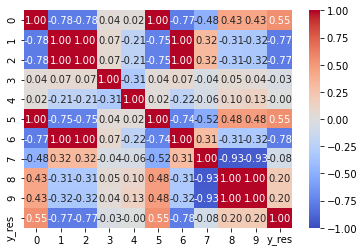

In [7]:
sns.heatmap(train_df.sample(200).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')

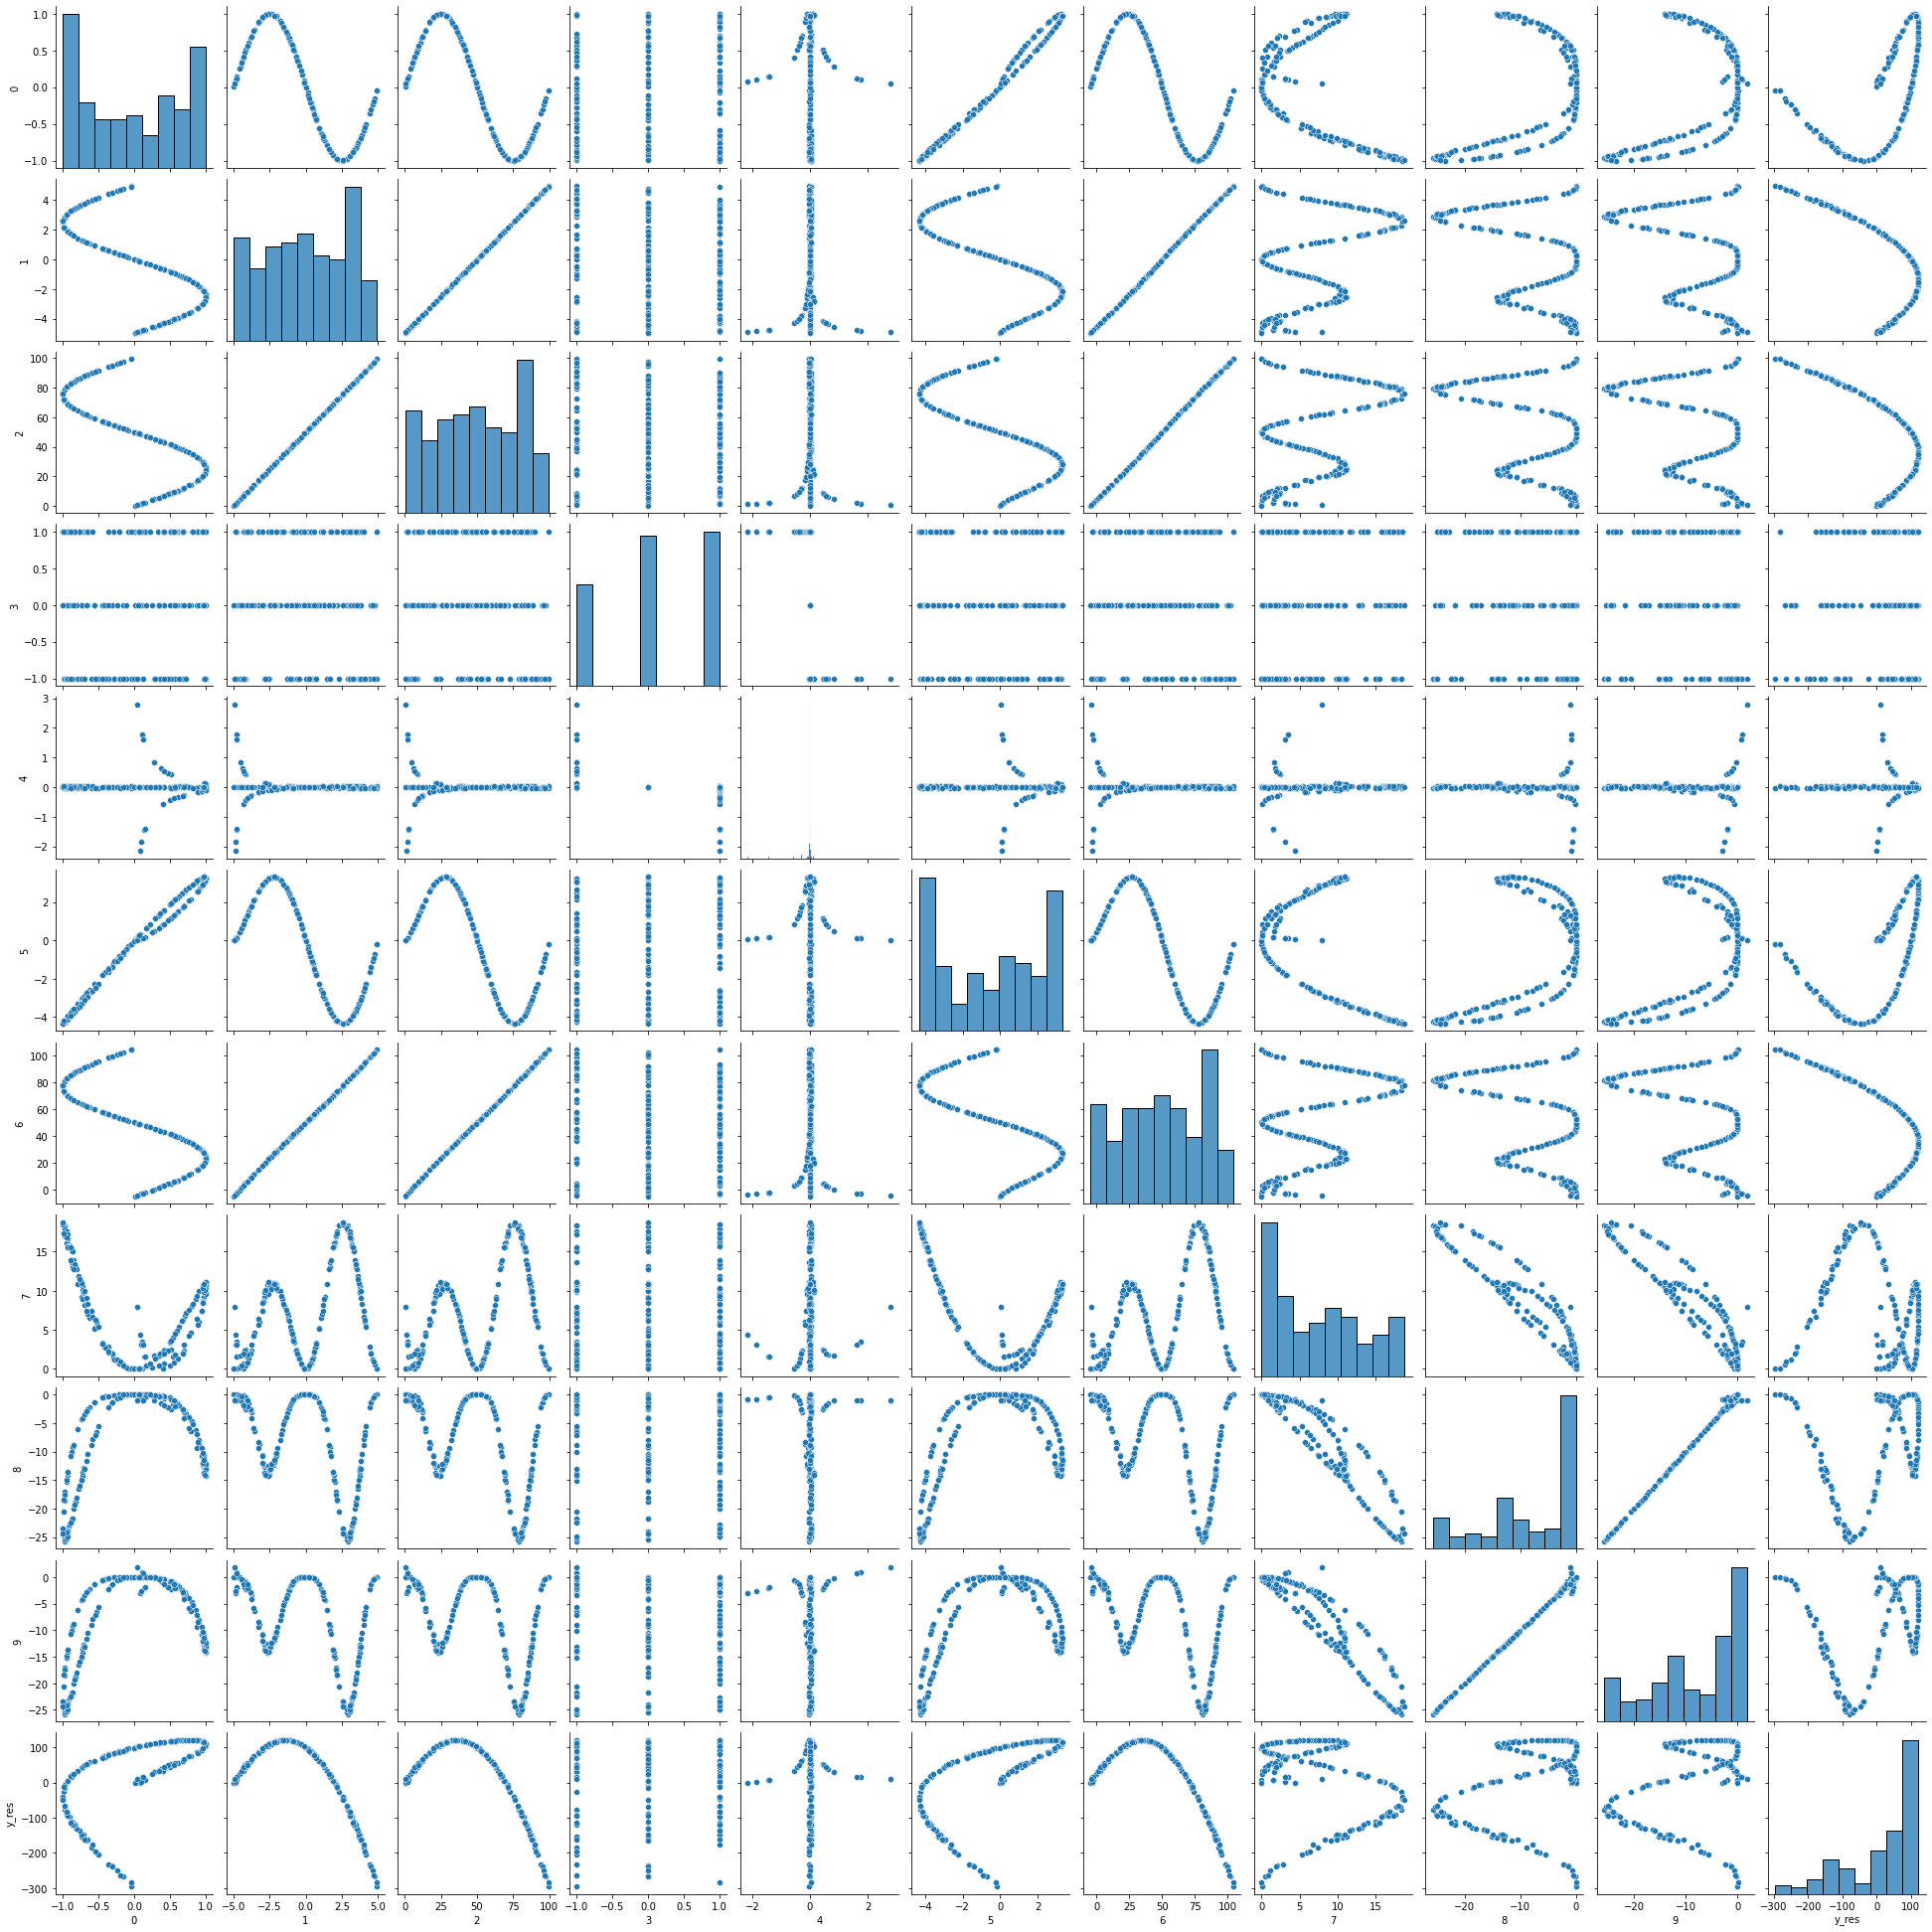

In [8]:
sns.pairplot(train_df.sample(200));

# a Undercomplete Linear AE

In [13]:
encoder = keras.models.Sequential([
    keras.layers.Dense(n_components, input_shape=[X_tr_std.shape[1]]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(X_tr_std.shape[1], input_shape=[n_components]),
])

autoencoder = keras.models.Sequential([encoder, decoder])

In [14]:
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 3)                 33        
_________________________________________________________________
sequential_4 (Sequential)    (None, 10)                40        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
88/88 [==============================] - 0s 2ms/step - loss: 0.7223 - val_loss: 0.2344
Epoch 2/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1984 - val_loss: 0.1693
Epoch 3/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1597 - val_loss: 0.1523
Epoch 4/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1453 - val_loss: 0.1449
Epoch 5/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.1415
Epoch 6/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1331 - val_loss: 0.1412
Epoch 7/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1405 - val_loss: 0.1403
Epoch 8/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1340 - val_loss: 0.1400
Epoch 9/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1309 - val_loss: 0.1391
Epoch 10/100
88/88 [==============================] - 0s 1ms/step - loss: 0.1370 - val_loss: 0.1397
Epoch 11/

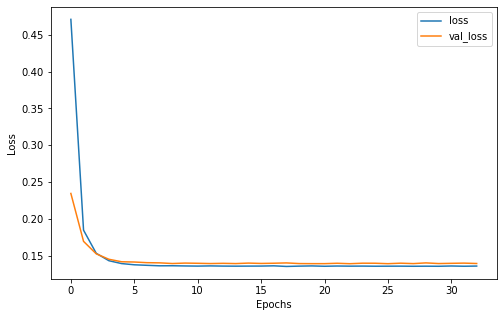

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

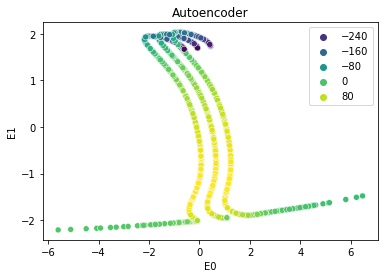

In [17]:
codings = encoder.predict(X_tr_std)
sns.scatterplot(x=codings[:,0], y=codings[:,1], hue=y_tr, palette='viridis')
plt.xlabel(f'E0')
plt.ylabel(f'E1')
plt.title(f'Autoencoder');

## SKLEARN PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=n_components,svd_solver='auto')
scores = pca.fit_transform(X_tr_std) # u

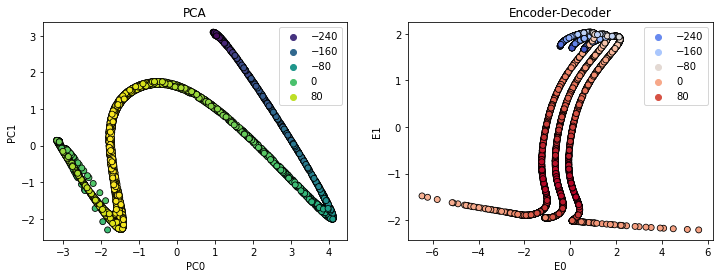

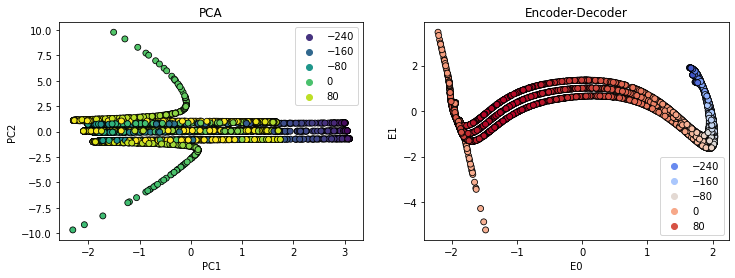

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-codings[:,0], y=codings[:,1], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=codings[:,1], y=codings[:,2], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E0')
plt.ylabel('E1');

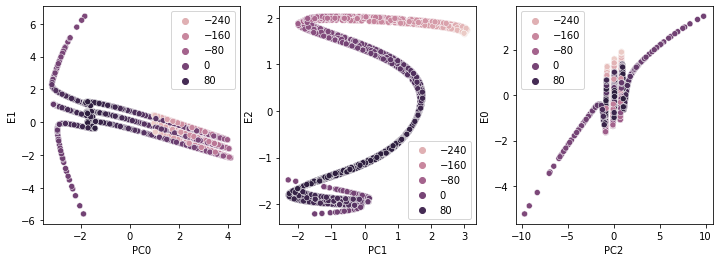

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=scores[:,0], y=codings[:,0], hue=y_tr)
plt.xlabel('PC0')
plt.ylabel('E1')
plt.subplot(1,3,2)
sns.scatterplot(x=scores[:,1], y=codings[:,1], hue=y_tr)
plt.xlabel('PC1')
plt.ylabel('E2')
plt.subplot(1,3,3)
sns.scatterplot(x=scores[:,2], y=codings[:,2], hue=y_tr)
plt.xlabel('PC2')
plt.ylabel('E0');

In [22]:
codings_train = encoder.predict(X_tr_std)
codings_test = encoder.predict(X_test_std)
scores_train = pca.transform(X_tr_std)
scores_test = pca.transform(X_test_std)

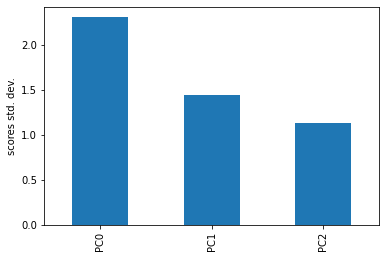

In [23]:
pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:blue')
plt.ylabel('scores std. dev.');

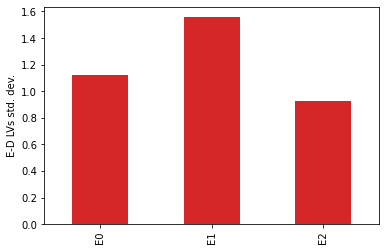

In [24]:
pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:red')
plt.ylabel('E-D LVs std. dev.');

<AxesSubplot:>

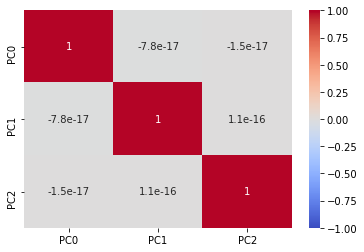

In [25]:
sns.heatmap(pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

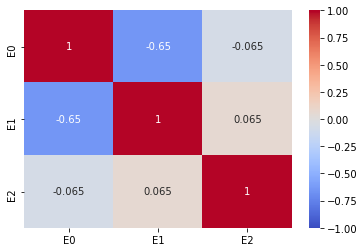

In [26]:
sns.heatmap(pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

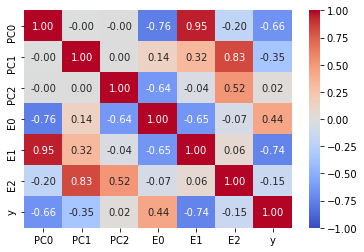

In [27]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]),
                       pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]),
                       pd.DataFrame(y_tr, columns=['y'])],1).corr(), 
            vmin=-1, vmax=1, cmap='coolwarm',annot=True, fmt='.2f')

# Predictions

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
# X_tr_std = sc.fit_transform(X_tr)
# X_valid_std = sc.transform(X_valid)
# X_test_std = sc.transform(X_test)
lr = LinearRegression()
lr.fit(X_tr_std,y_tr)
lr.score(X_tr_std,y_tr),lr.score(X_test_std,y_test)

(0.772907097901866, 0.7606418905715606)

In [30]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=5)
rfc.fit(X_tr_std,y_tr)
rfc.score(X_tr_std,y_tr), rfc.score(X_test_std,y_test)

(0.9961540501563956, 0.9960033832815697)

In [31]:
lr = LinearRegression()
lr.fit(codings_train,y_tr)
lr.score(codings_train,y_tr),lr.score(codings_test,y_test)

(0.5593911645809874, 0.5516355860134208)

In [32]:
lr = LinearRegression()
lr.fit(scores_train,y_tr)
lr.score(scores_train,y_tr),lr.score(scores_test,y_test)

(0.5599054385022555, 0.552413110767489)

In [33]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=5)
rfc.fit(scores_train,y_tr)
rfc.score(scores_train,y_tr), rfc.score(scores_test,y_test)

(0.985157334295326, 0.9813955227964805)

In [34]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=5)
rfc.fit(codings_train,y_tr)
rfc.score(codings_train,y_tr), rfc.score(codings_test,y_test)

(0.9950827153131677, 0.9897552453845291)

# STACKED ENCODER-DECODER

In [35]:
# X_tr_std = sc.fit_transform(X_tr)
# X_valid_std = sc.transform(X_valid)
# X_test_std = sc.transform(X_test)

In [36]:
st_encoder = keras.models.Sequential([
    keras.layers.Dense(25, input_shape=[X_tr_std.shape[1]]),
    keras.layers.Dense(10),
    keras.layers.Dense(n_components),
])

st_decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[n_components]),
    keras.layers.Dense(25),
    keras.layers.Dense(X_tr_std.shape[1]),
])

st_autoencoder = keras.models.Sequential([st_encoder, st_decoder])
st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
st_autoencoder.summary()
history = st_autoencoder.fit(X_tr_std,X_tr_std, epochs=500,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

st_codings_train = st_encoder.predict(X_tr_std)
st_codings_test = st_encoder.predict(X_test_std)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 3)                 568       
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                575       
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
88/88 [==============================] - 1s 3ms/step - loss: 0.5059 - val_loss: 0.1772
Epoch 2/500
88/88 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.1430
Epoch 3/500
88/88 [==============================] - 0s 1ms/step - loss: 0.1426 - val_loss: 0.1423
Epoch 4/500
88/88 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1430
Epoch 5/500
88/88 [==============================] - 0s 1ms/step - loss: 0.1375 - val_loss: 0.1508
Epoch 6/500
88/88 [

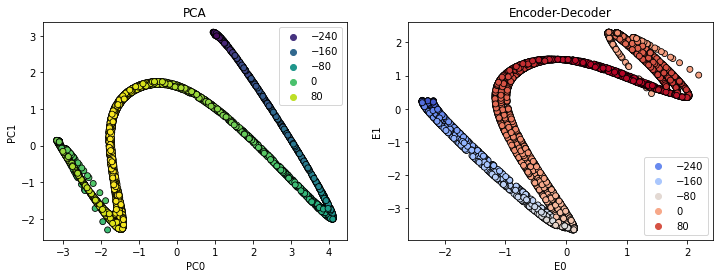

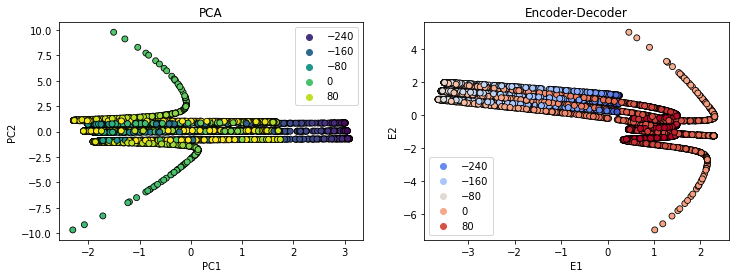

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-st_codings_train[:,0], y=st_codings_train[:,1], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=st_codings_train[:,1], y=st_codings_train[:,2], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E1')
plt.ylabel('E2');

In [38]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=5)
rfc.fit(st_codings_train,y_tr)
rfc.score(st_codings_train,y_tr), rfc.score(st_codings_test,y_test)

(0.9869380580811086, 0.9794629162016664)

# Non linear ENCODER-DECODER

In [39]:
nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[X_tr_std.shape[1]], activation='selu'),
    keras.layers.Dense(10, activation='selu'),
    keras.layers.Dense(n_components, activation='selu'),
])

nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[n_components], activation='selu'),
    keras.layers.Dense(15, activation='selu'),
    keras.layers.Dense(X_tr_std.shape[1], activation='selu'),
])

nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1, decay=1e-4))
nl_st_autoencoder.summary()


history = nl_st_autoencoder.fit(X_tr_std,X_tr_std, epochs=500,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

nl_st_codings_train = nl_st_encoder.predict(X_tr_std)
nl_st_codings_test = nl_st_encoder.predict(X_test_std)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 3)                 358       
_________________________________________________________________
sequential_10 (Sequential)   (None, 10)                365       
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
88/88 [==============================] - 1s 3ms/step - loss: 0.5045 - val_loss: 0.2360
Epoch 2/500
88/88 [==============================] - 0s 1ms/step - loss: 0.2151 - val_loss: 0.2113
Epoch 3/500
88/88 [==============================] - 0s 1ms/step - loss: 0.1974 - val_loss: 0.1883
Epoch 4/500
88/88 [==============================] - 0s 1ms/step - loss: 0.1600 - val_loss: 0.1690
Epoch 5/500
88/88 [==============================] - 0s 2ms/step - loss: 0.1619 - val_loss: 0.1480
Epoch 6/500
88/88 [===

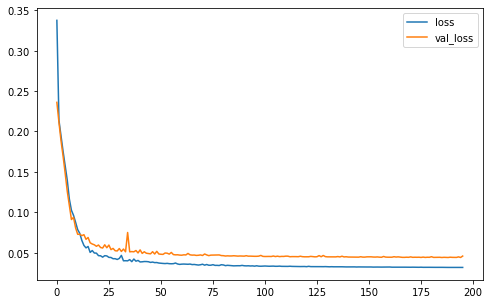

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5));

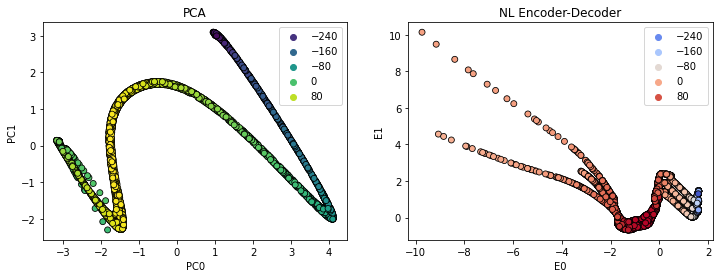

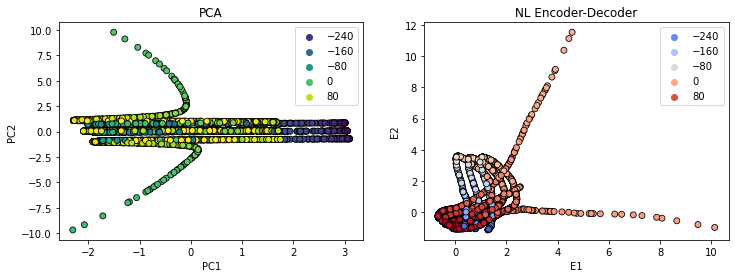

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-nl_st_codings_train[:,0], y=nl_st_codings_train[:,1], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('NL Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=nl_st_codings_train[:,1], y=nl_st_codings_train[:,2], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('NL Encoder-Decoder')
plt.xlabel('E1')
plt.ylabel('E2');

In [42]:
rfc.fit(nl_st_codings_train,y_tr)
rfc.score(nl_st_codings_train,y_tr), rfc.score(nl_st_codings_test,y_test)

(0.9974475208821503, 0.9971174144504477)

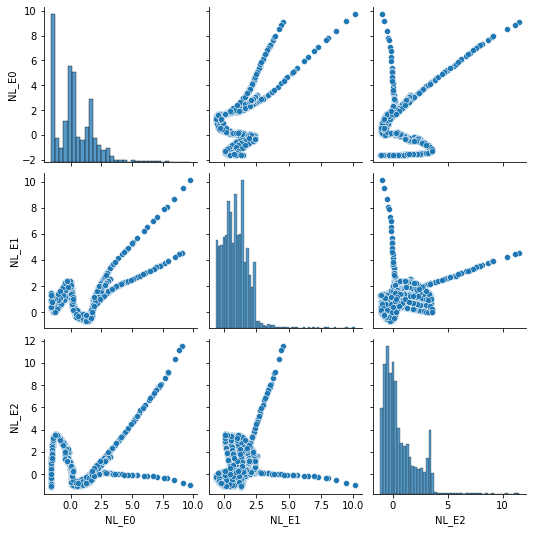

In [43]:
sns.pairplot(pd.DataFrame(nl_st_codings_train, columns=['NL_E'+str(i) for i in range(pca.n_components_)]))

<AxesSubplot:>

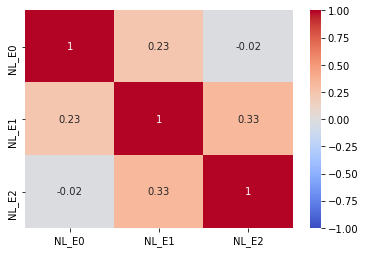

In [44]:
sns.heatmap(pd.DataFrame(nl_st_codings_train, columns=['NL_E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

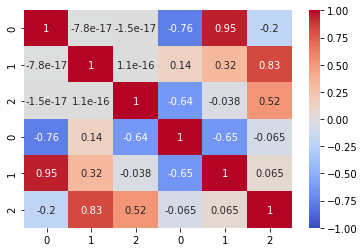

In [45]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(codings)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

<AxesSubplot:>

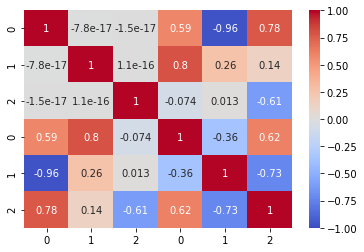

In [46]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(st_codings_train)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

<AxesSubplot:>

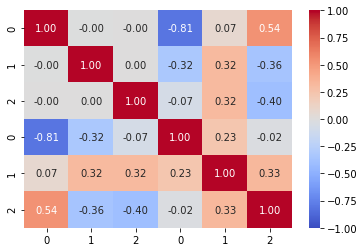

In [47]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(nl_st_codings_train)],1).corr(), 
            vmin=-1, vmax=1, cmap='coolwarm',annot=True, fmt='.2f')

In [49]:
from sklearn.model_selection import cross_val_score

(0.9, 1.0)

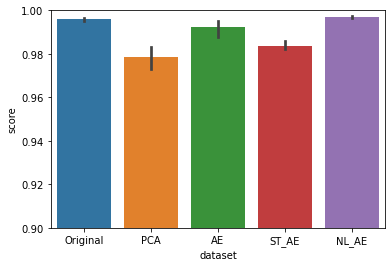

In [50]:
labels = ['Original', 'PCA','AE']
modelscores = pd.DataFrame(columns=labels)
modelscores['PCA'] = cross_val_score(rfc, scores_train, y_tr, cv=5, n_jobs=-1)
modelscores['AE'] = cross_val_score(rfc, codings_train, y_tr, cv=5, n_jobs=-1)
modelscores['Original'] = cross_val_score(rfc, X_tr_std, y_tr, cv=5, n_jobs=-1)
modelscores['ST_AE'] = cross_val_score(rfc, st_codings_train, y_tr, cv=5, n_jobs=-1) 
modelscores['NL_AE'] = cross_val_score(rfc, nl_st_codings_train, y_tr, cv=5, n_jobs=-1) 
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.9,1)